# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

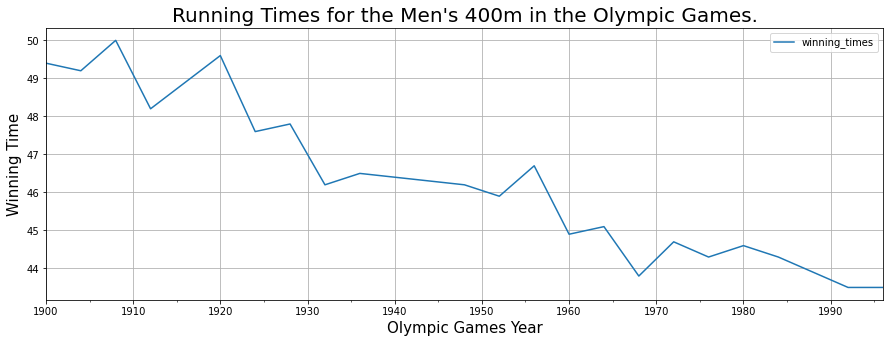

In [3]:
# Plot the time series
ax = data.plot(figsize=(15,5), grid=True)
ax.set_title("Running Times for the Men's 400m in the Olympic Games.", size=20)
ax.set_xlabel("Olympic Games Year", fontsize=15)
ax.set_ylabel("Winning Time", fontsize=15);

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff(periods=1).dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

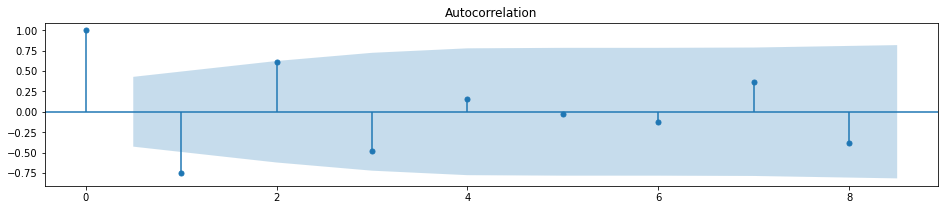

In [5]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(data_diff, ax=ax, lags=8);

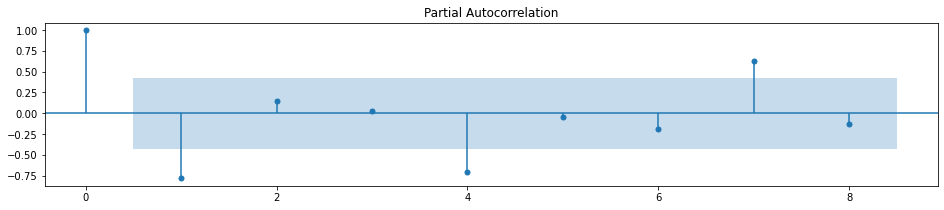

In [6]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(data_diff, ax=ax, lags=8);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [7]:
# Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA
# order=(AR, d, MA), d is zero for now

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Instantiate and fit an MA(1) model to the simulated data
# use this as sort of a baseline
mod_arma = ARIMA(data_diff, order=(0,0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -22.443
Date:                Sat, 22 Oct 2022   AIC                             50.885
Time:                        21:41:41   BIC                             54.019
Sample:                    12-31-1904   HQIC                            51.565
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3053      0.059     -5.201      0.000      -0.420      -0.190
ma.L1         -0.7390      0.282     -2.620      0.009      -1.292      -0.186
sigma2         0.4780      0.214      2.232      0.026       0.058       0.898
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.38   Prob(JB):                         0.70
Heteroskedasticity (H):               0.26   Skew:                            -0.18
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
def best_arma(data, ar_range, ma_range):
    best = 100
    best_ar = 0
    best_ma = 0

    for ma in ma_range:
        for ar in ar_range:
            mod = ARIMA(data, order=(ar,0,ma)).fit()
            if mod.aic < best:
                best=mod.aic
                best_ar=ar
                best_ma=ma
    model = ARIMA(data, order=(best_ar,0,best_ma)).fit()
    print(f"ARIMA(data_diff, order=({best_ar},0,{best_ma}))")
    #return  model.summary()

In [10]:
best_arma(data_diff, range(9), range(1,3))


ARIMA(data_diff, order=(2,0,2))


In [ ]:
# ran for loop with range(1,4) and order=(0,0,3) returned lower aic but with warning:
#     UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
#     warn('Non-invertible starting MA parameters found.')

In [11]:
# based on for loop and confirmed by plots, order=(2,0,2)
mod_arma = ARIMA(data_diff, order=(2,0,2)).fit()

# Print out summary information on the fit
mod_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -16.472
Date:                Sat, 22 Oct 2022   AIC                             44.943
Time:                        21:41:46   BIC                             51.210
Sample:                    12-31-1904   HQIC                            46.303
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2717      0.103     -2.629      0.009      -0.474      -0.069
ar.L1         -1.7573      0.117    -14.990      0.000      -1.987      -1.528
ar.L2         -0.9179      0.120     -7.664      0.000      -1.153      -0.683
ma.L1          1.5669     50.157      0.031      0.975     -96.739      99.873
ma.L2          0.9986     63.913      0.016      0.988    -124.268     126.265
sigma2         0.2126     13.545      0.016      0.987     -26.336      26.761
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.86   Prob(JB):                         0.65
Heteroskedasticity (H):               0.41   Skew:                            -0.30
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
print(f"{res_arma.aic}, {mod_arma.aic}")

50.88519452982258, 44.94308856473796


## What is your final model? Why did you pick this model?

In [13]:
# Your comments here
# I chose my model based on lowest AIC of ~ 44.943, ARMA(2,2)

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 